<a href="https://colab.research.google.com/github/shivangi402/Nteflix-Movies-TV-shows-clustering/blob/main/Individual_unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Netflix Movies and TV Shows Clustering**

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Shivangi Singh




# **Project Summary -**
Netflix is a popular streaming platform that heavily relies on recommendation systems to personalize the viewing experience for its users. Netflix employs a sophisticated recommendation algorithm that analyzes user behavior, preferences, and viewing history to provide personalized movie and TV show recommendations.
<br>
**Goal:** In this project, we have done clustering of Netflix shows and movies in such a way that shows with similar specification are grouped into same cluster.
<br>
**Data Preparation:** It includes observing your data which helps for further analysis.
<br>
**Data Analysis & Visualization:** It includes data cleaning, data wrangling, and finding some patterns through visualization techniques.
<br>
**Model Implementation:** Clustering the shows through k-means algorithm, hierarchical clustering and recomendation system.

**Conclusion:** Observing various clusters and testing recommedation system.

# **GitHub Link -** https://github.com/shivangi402/Nteflix-Movies-TV-shows-clustering

# **Problem Statement**
Netflix is an American subscription video on-demand over-the-top streaming service owned and operated by Netflix, Inc. The streaming service's number of movies has decreased by more than 2000 titles since 2010, while its number of TV shows has nearly tripled.
<br>
The goal is to do:
- Exploratory Data Analysis
- Understanding what type content is available in different countries.
- If Netflix has been increasingly focusing on TV rather than movies in recent years.
- Clustering similar content by  matching text-based features.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries and modules

# libraries that are used for analysis and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# libraries used to process textual data
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

# libraries used to implement clusters
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

# libraries that are used to construct a recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
#Loading the data
df = pd.read_csv('/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [ ]:
# Viewing the top 5 rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns
df.shape

(7787, 12)

In [ ]:
print(f'number of rows : {df.shape[0]}  \nnumber of columns : {df.shape[1]}')

number of rows : 7787  
number of columns : 12


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Checking Duplicate Values
duplicates =len(df[df.duplicated()])
print(duplicates)

0


**Observation:**
<br>
No duplicate values are present in the datasheet.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# Missing Values Percentage
round(df.isna().sum()/len(df)*100, 2)

show_id          0.00
type             0.00
title            0.00
director        30.68
cast             9.22
country          6.51
date_added       0.13
release_year     0.00
rating           0.09
duration         0.00
listed_in        0.00
description      0.00
dtype: float64

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
release_year,7787.0,2013.93258,8.757395,1925.0,2013.0,2017.0,2018.0,2021.0


### Variables Description
* **show_id :** Unique ID for every Movie/Show
* **type :** Identifier - Movie/Show
* **title :** Title of the Movie/Show
* **director :** Director of the Movie/Show
* **cast :** Actors involved in the Movie/Show
* **country :** Country where the Movie/Show was produced
* **date_added :** Date it was added on Netflix
* **release_year :** Actual Release year of the Movie/Show
* **rating :** TV Rating of the Movie/Show
* **duration :** Total Duration - in minutes or number of seasons
* **listed_in :** Genre
* **description :** The Summary description

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 7787
No. of unique values in type is 2
No. of unique values in title is 7787
No. of unique values in director is 4049
No. of unique values in cast is 6831
No. of unique values in country is 681
No. of unique values in date_added is 1565
No. of unique values in release_year is 73
No. of unique values in rating is 14
No. of unique values in duration is 216
No. of unique values in listed_in is 492
No. of unique values in description is 7769


##  ***Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variable***

**Types of Column**

In [ ]:
# number of values of different categories in 'type'
df['type'].value_counts()

Movie      5377
TV Show    2410
Name: type, dtype: int64

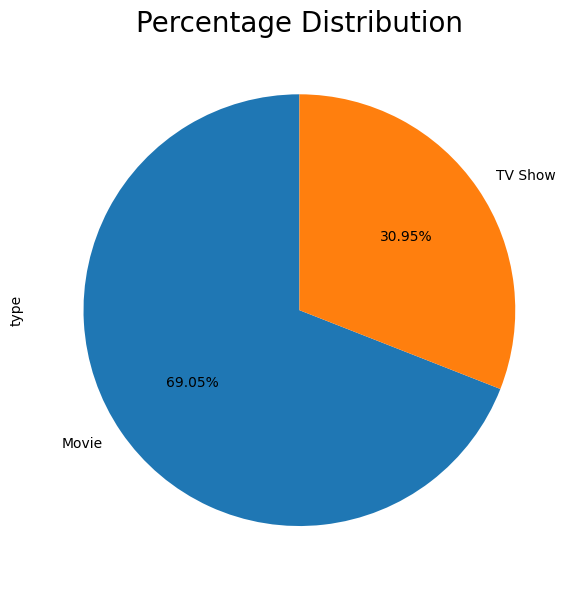

In [ ]:
#Percentage distribution of TV shows and movies
plt.figure(figsize=(10,5))
# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
Answer: Pie-chart displays the relative proportions of multiple classes of data.

##### 2. What is/are the insight(s) found from the chart?
Answer:
- The number of movies are more than TV shows in Netflix.
- Around 31% are TV shows and movies are around 70.0%.

##### 3. Will the gained insights help creating a positive business impact?
Answer: Yes, It will help to understand the contribution of movies and TV shows on the business.

# **Titles**

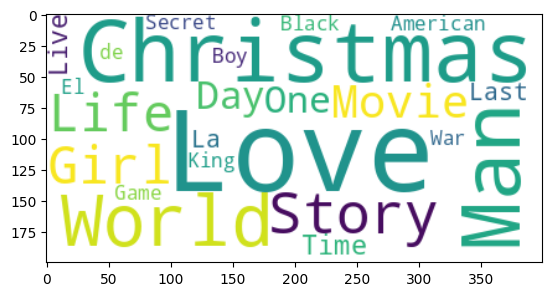

In [ ]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

**Observation:**
- Words like "love", "christmas", "Girl", "Man" are coming frquently in the movie title column.

**Column: Cast**

In [ ]:
#Casting in the series and movies
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [ ]:
## seperating actors from cast column
cast = df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()


Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [ ]:
print(f"Number of TV Shows actors: {len(df[df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


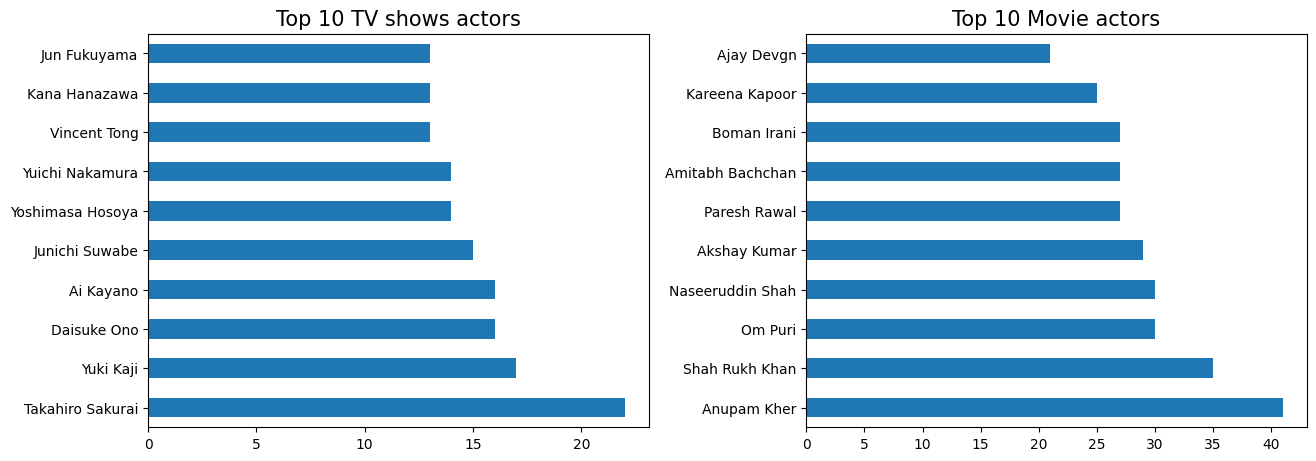

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### 1. Why did you pick the specific chart?
Answer: Bar chart shows the relative numbers or proportions of multiple categories.

##### 2. What is/are the insight(s) found from the chart?
Answer:
- Takahiro Sakurai is the top actor in the TV shows.
- Anupam Kher is the top actor in the movies.

##### 3. Will the gained insights help creating a positive business impact?
Answer: The actors with more popularity may get the highest views on their shows/movies.

**Column: Country**

In [ ]:
# number of unique values
df['country'].nunique()

681

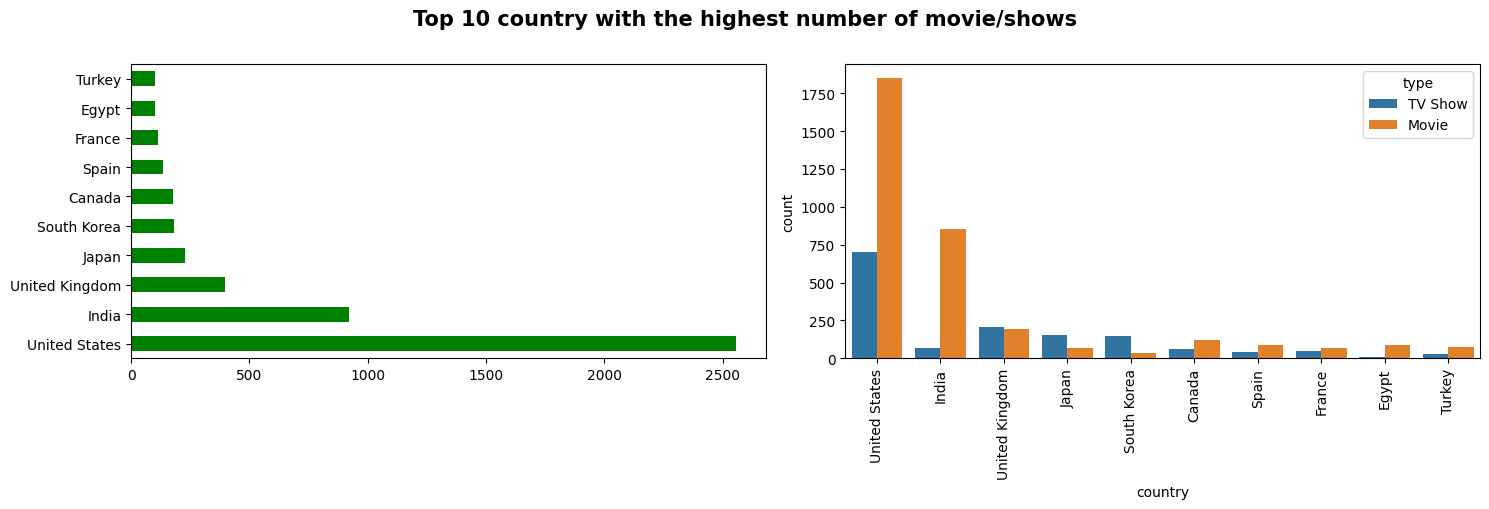

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0], color ='green')

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type', order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
Answer: Bar chart shows the relative numbers or proportions of multiple categories.

##### 2. What is/are the insight(s) found from the chart?
Answer:
- The highest number of movies/shows is produced by US, followed by India nd UK.
- Movies are more produced in US and India. But, in the UK shows outnumbered movies.
- In south Korea, the number of shows are way more far than movies.

##### 3. Will the gained insights help creating a positive business impact?
Answer: Country with highest number of movies/shows impact netflix business positively.

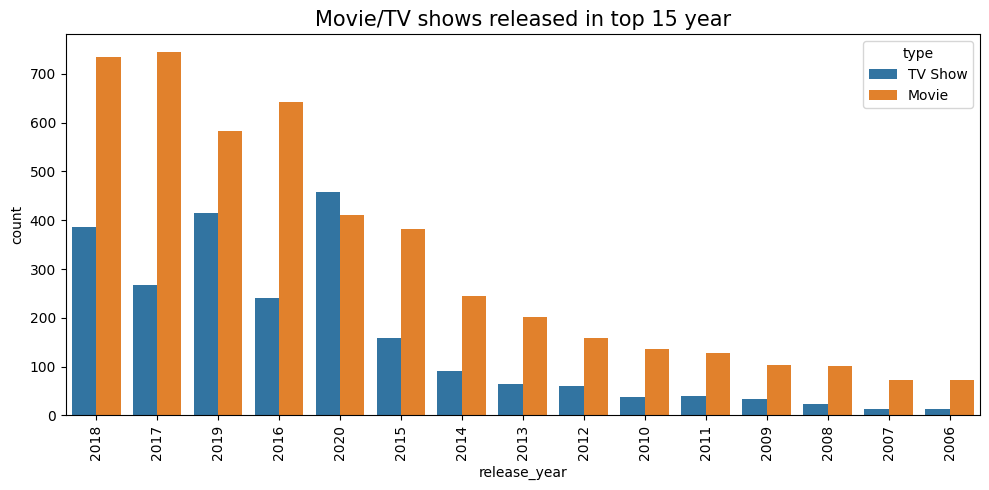

In [ ]:
#Movie/TV shows released in top 15 year
plt.figure(figsize=(10,5))
# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15],)
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
Answer: Bar chart shows the relative numbers or proportions of multiple categories.

##### 2. What is/are the insight(s) found from the chart?
Answer:  From 2015, TV shows are also taking prominent place in the Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Answer: Yes, the insight helps in finding the contribution of movies and shows in the business of netflix.

**Column: 'rating'**

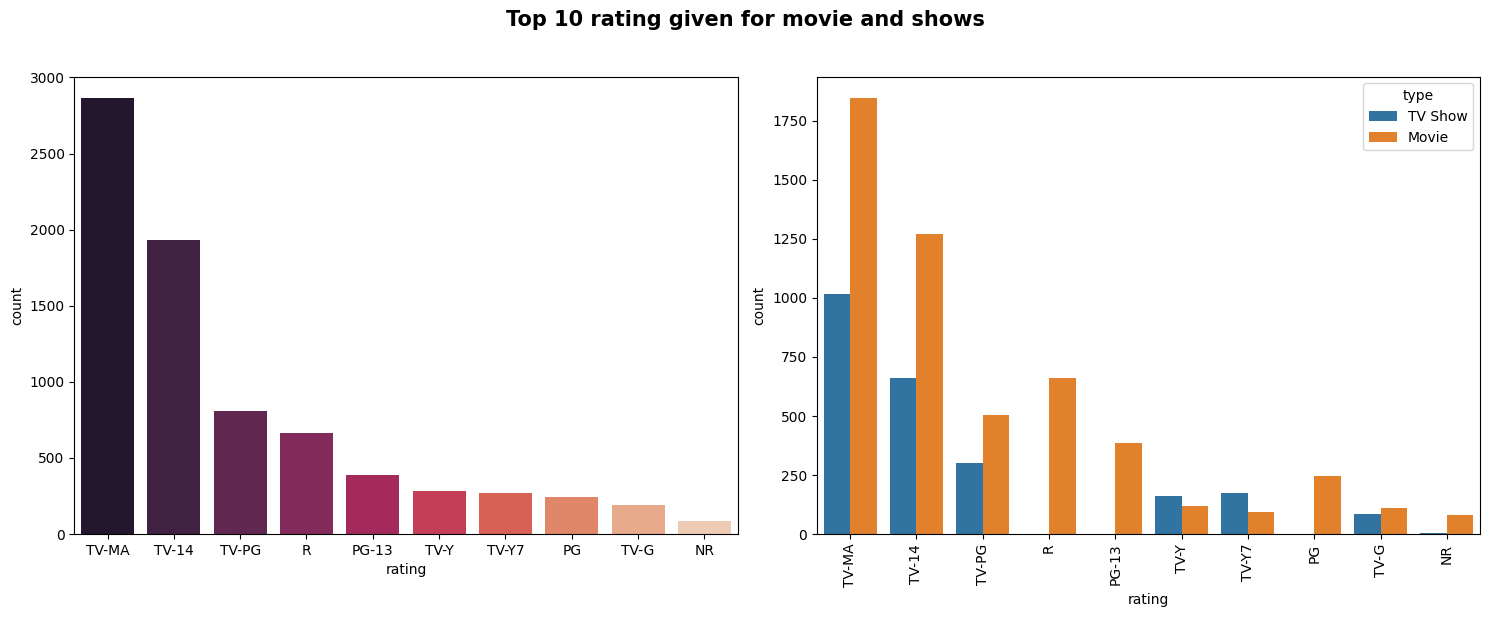

In [ ]:
#Top 10 rating given for movies and shows
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0], palette="rocket")

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
Answer: Bar chart shows the relative numbers or proportions of multiple categories.

##### 2. What is/are the insight(s) found from the chart?
Answer:
- The highest rating given to TV shows and movies is TV-MA which stands for "mature-audience".
- The second highest is TV-14 which stands for "younger audience".
- If we compared between TV shows and movies, movies got the highest rating.

##### 3. Will the gained insights help creating a positive business impact?
Answer: The rating helps us to understand the audience of the netflix.

**Column: 'listed_in'**

In [ ]:
#Observing Genre
df['listed_in'].head()

0    International TV Shows, TV Dramas, TV Sci-Fi &...
1                         Dramas, International Movies
2                  Horror Movies, International Movies
3    Action & Adventure, Independent Movies, Sci-Fi...
4                                               Dramas
Name: listed_in, dtype: object

In [ ]:
# seperating genre from listed_in columns
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786


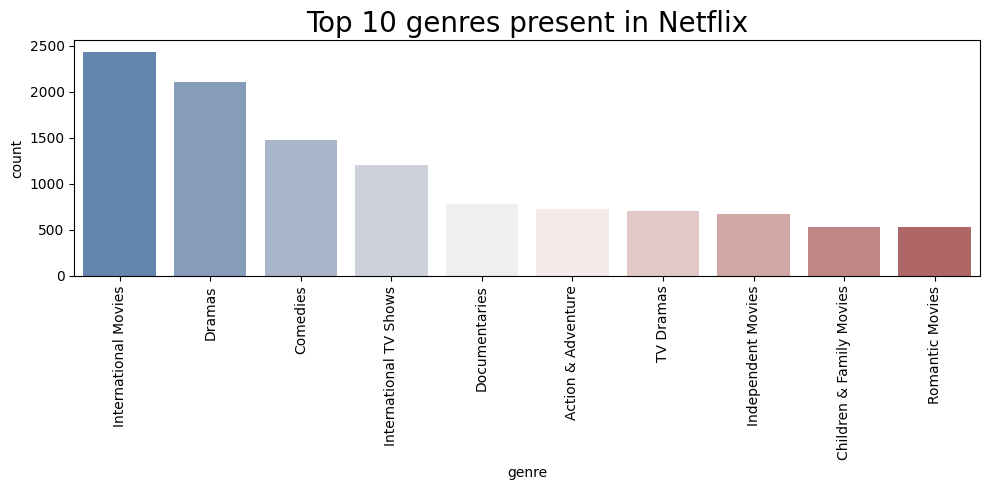

In [ ]:
# plotting graph
plt.figure(figsize=(10,5))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10],palette="vlag")
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?
Answer: Bar chart shows the relative numbers or proportions of multiple categories

##### 2. What is/are the insight(s) found from the chart?
Answer: International Movies, Dramas and Comedies contribute to the majority of genre.

##### 3. Will the gained insights help creating a positive business impact?
Answer: It helps in finding the genre that contributes more to the netflix.

**Column: description**

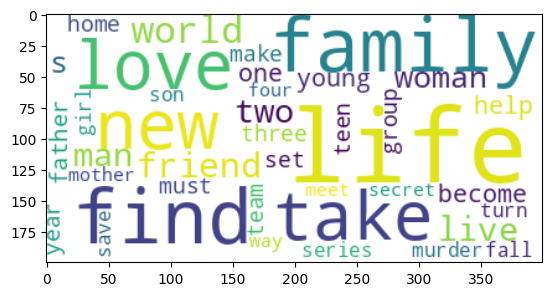

In [ ]:
#Finding most frequent word used
text = " ".join(word for word in df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

**Observation**
<br>
Most commonly word used in the description are "love", "family", "father","find", "life".

# **Feature Engineering & Data Pre-processing**

**Duplicate Values**

In [ ]:
# checing duplicate values
df.duplicated().sum()

0

**Missing Values**

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


In [ ]:
# Handling Missing Values & Missing Value Imputation
df[['director','cast','country']] = df[['director','cast','country']].fillna(' ')
df.dropna(axis=0, inplace=True)

In [ ]:
# checking for null values
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### **Handling Outliers**

<Axes: >

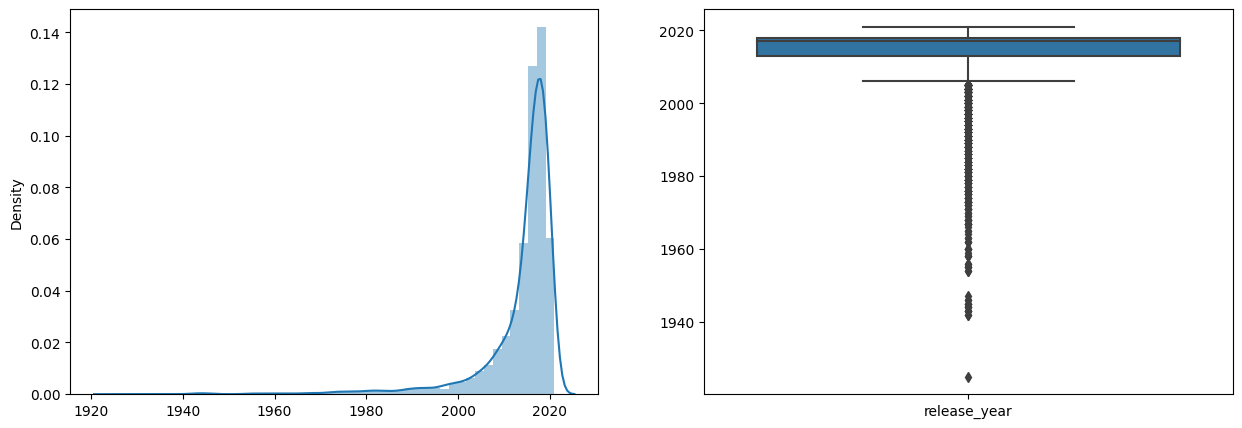

In [ ]:
# Observing Outliers & Outlier treatments

# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,5))

# Display distribution chart and box-plot
sns.distplot(x=df['release_year'], ax=ax[0])
sns.boxplot(data=df, ax=ax[1])

**Observation**
* Except release_year, all columns are present in textual format.
* The textual format contains the data that need to build cluster/building model. There is no need to handle outliers.

**Textual Data Preprocessing**

Textual data preprocessing refers to the set of steps and techniques used to clean and transform raw text data into a format that is suitable for analysis or natural language processing (NLP) tasks. The process typically involves several steps to remove noise, standardize text, and extract relevant features. The preprocessing steps typically include tokenization, stop-word removal, stemming or lemmatization, lowercasing, removing punctuation, and removing numbers.

**Selecting Attributes**

In [ ]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."


Clustering the Netflix movies and TV shows into groups based on the following textual characteristics:
- Director
- Cast
- Country
- Rating
- Listed in (genres)
- Description

In [ ]:
# consolidating all of the required data into a single column.
df['text_data'] = df['director'] + df['cast'] + df['country'] + \
                     df['rating'] + df['listed_in'] + df['description']


In [ ]:
# checking the row
df['text_data'][0]

' João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso FrateschiBrazilTV-MAInternational TV Shows, TV Dramas, TV Sci-Fi & FantasyIn a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

**Removing Stop words and Lower Casing**

**Stop word removal:** Removing common words (such as "the," "and," "is") that do not carry much information and may appear frequently in the text.
<br>
**Lowercasing:** Converting all text to lowercase to ensure consistency and avoid treating the same word as different based on capitalization.

In [ ]:
# creating a set of English stop words
stop_words = stopwords.words('english')

# displaying stopwords
np.array(stop_words)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
#Function for removing stopwords and keeping it in lower case
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
# applying stopwords function.
df['text_data'] = df['text_data'].apply(stopwords)

In [ ]:
# checking the first row again
df['text_data'][0]

'joão miguel, bianca comparato, michel gomes, rodolfo valente, vaneza oliveira, rafael lozano, viviane porto, mel fronckowiak, sergio mamberti, zezé motta, celso frateschibraziltv-mainternational tv shows, tv dramas, tv sci-fi & fantasyin future elite inhabit island paradise far crowded slums, get one chance join 3% saved squalor.'

**Successfully removed the stopwords and changing into lower case.**

# **Removing Punctuations**

Removing special characters and punctuation: Removing non-alphanumeric characters and punctuation marks that may not be essential for analysis. Punctuations does not carry much information and add noise to the data. Removing punctuations helps in reducing the size of vocabulary.

In [ ]:
# function to remove punctuations

def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, which in effect deletes the punctuation marks.
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
# Applying function
df['text_data'] = df['text_data'].apply(remove_punctuation)

In [ ]:
# checking the first row after the process
df['text_data'][0]

'joão miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmainternational tv shows tv dramas tv scifi  fantasyin future elite inhabit island paradise far crowded slums get one chance join 3 saved squalor'

**Successfully removed the punctuation from the corpus**

# **Stemming**

Stemming is a technique used in natural language processing (NLP) to reduce words to their base or root form, known as the stem. The stem represents the core meaning of a word and is useful for tasks like text analysis, information retrieval, and sentiment analysis. For example, consider the words "running," "runs," and "ran." By applying a stemming algorithm, these words can be reduced to their common stem "run."

In [ ]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

# define a function to apply stemming using SnowballStemmer
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [ ]:
# Appying stemming function
df['text_data'] = df['text_data'].apply(stemming)

In [ ]:
# checking the first row
df['text_data'][0]

'joão miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zezé motta celso frateschibraziltvmaintern tv show tv drama tv scifi fantasyin futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor'

**Successfully completed the stemming process**

# **Text Vectorization**

Text vectorization is the process of converting text data into numerical representations, or vectors, that can be understood and processed by machine learning algorithms.
<br>
Here we are using TF-IDF Vectorization. Term Frequency-Inverse Document Frequency (TF-IDF) is a commonly used technique that reflects the importance of a word in a document within a larger collection of documents. It assigns a weight to each word based on its frequency in the document (TF) and the inverse frequency across the entire corpus (IDF). TF-IDF vectorization captures the importance of words while reducing the impact of commonly occurring words.

In [ ]:
# create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 10000)   # max features = 10000 to prevent system from crashing

# fit the vectorizer using the text data
tfidf.fit(df['text_data'])

# collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [ ]:
# convert vector into array form for clustering
vector = tfidf.transform(df['text_data']).toarray()

# summarize encoded vector
print(vector)
print(f'shape of the vector : {vector.shape}')
print(f'datatype : {type(vector)}')


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7770, 10000)
datatype : <class 'numpy.ndarray'>


# **Dimensionality Reduction**

Dimensionality reduction in NLP refers to the process of reducing the number of features or dimensions in a textual dataset while preserving as much of the relevant information as possible.
<br>We are using principal component analysis for dimensionality reduction. It transforms the original high-dimensional features into a new set of orthogonal dimensions called principal components. These components are sorted in descending order of variance, allowing for the selection of the most important dimensions while discarding those with lower variance.

In [ ]:
# using PCA to reduce dimensionality
pca = PCA(random_state=42)
pca.fit(vector)

PCA(random_state=42)

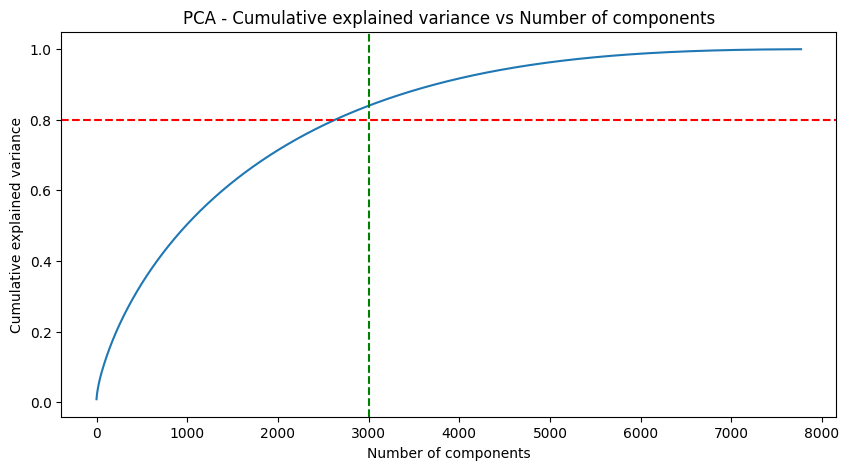

In [ ]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3000, color='green', linestyle='--')
plt.show()

**Observation:**
- Around 7500 contribute to the 100 precent of variance.
- 3000 components account for approximately 80 percent of the variance.
- Hence, we have taken top 3000 component to reduce dimensionality, so that model capture atleast 80% of the variance.

In [ ]:
#Reducing the dimensions to 3000 using pca
pca = PCA(n_components=3000, random_state=42)
pca.fit(vector)

PCA(n_components=3000, random_state=42)

In [ ]:
# transformed features
X = pca.transform(vector)

# shape of transformed vectors
X.shape

(7770, 3000)

# **Model Implementation**

**K-Means Clustering**

K-means clustering is a popular unsupervised machine learning algorithm used for grouping data points into distinct clusters. It aims to partition a given dataset into K clusters, where each data point belongs to the cluster with the nearest mean value.
<br>
The K-means algorithm aims to minimize the within-cluster sum of squares (WCSS), which is the sum of squared distances between each data point and its assigned centroid. This optimization objective encourages compact and well-separated clusters.

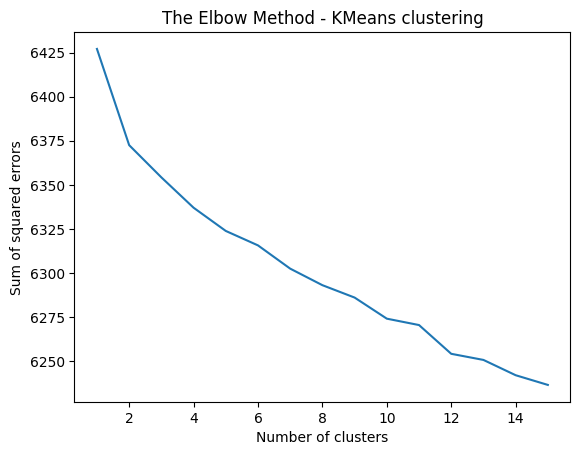

In [ ]:
#Determining optimal value of k using elbow method
# Initialize a list to store the sum of squared errors for each value of K
SSE = []

for k in range(1, 16):
  # Initialize the k-means model with the current value of K
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Compute the sum of squared errors for the model
  SSE.append(kmeans.inertia_)

# Plot the values of SSE
plt.plot(range(1, 16), SSE)
plt.title('The Elbow Method - KMeans clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.show()

As the number of cluster increases, the distance between the centroid and sum of squared distance between each point decreases.

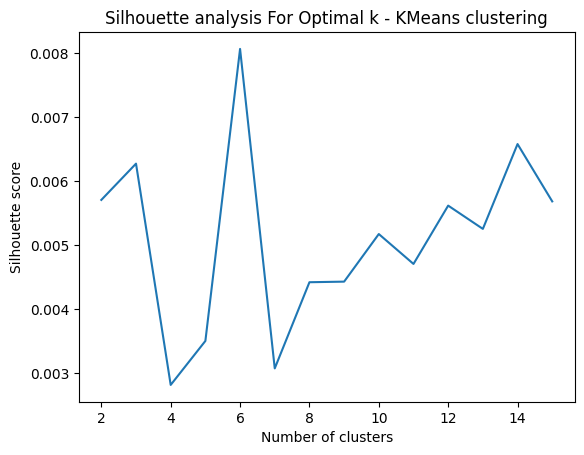

In [ ]:
#Determining optimal value of k using Silhouette method
# Initialize a list to store the silhouette score for each value of k
silhouette_avg = []

for k in range(2, 16):
  # Initialize the k-means model with the current value of k
  kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
  # Fit the model to the data
  kmeans.fit(X)
  # Predict the cluster labels for each point in the data
  labels = kmeans.labels_
  # Compute the silhouette score for the model
  score = silhouette_score(X, labels)
  silhouette_avg.append(score)

# Plot the Silhouette analysis
plt.plot(range(2,16), silhouette_avg)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k - KMeans clustering')
plt.show()

The highest silhouette score is for thee cluster number 6. So, we are going to build 6 cluster using k-means clustering algorithm.

In [ ]:
# Clustering the data into 6 clusters
kmeans = KMeans(n_clusters=6, init='k-means++', random_state=33)
kmeans.fit(X)

KMeans(n_clusters=6, random_state=33)

In [ ]:
# Evaluation metrics - distortion, Silhouette score
kmeans_distortion = kmeans.inertia_
kmeans_silhouette_score = silhouette_score(X, kmeans.labels_)

print((kmeans_distortion, kmeans_silhouette_score))

(6314.960206884272, 0.0038020094589417144)


In [ ]:
# Adding a kmeans cluster number attribute
df['kmeans_cluster'] = kmeans.labels_

In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'kmeans_cluster']]

,type,title,director,cast,country,rating,listed_in,description,kmeans_cluster
6374,TV Show,The Frankenstein Chronicles,,"Sean Bean, Tom Ward, Richie Campbell, Vanessa ...",United Kingdom,TV-MA,"British TV Shows, Crime TV Shows, Internationa...",A detective tracks what seems to be a killer w...,2
6401,Movie,The Good Catholic,Paul Shoulberg,"Zachary Spicer, Wrenn Schmidt, Danny Glover, J...",United States,PG-13,"Comedies, Dramas, Romantic Movies",A young priest’s faith is tested when he finds...,1
4188,Movie,Monster High: Escape from Skull Shores,"Steve Ball, Andrew Duncan","Kate Higgins, Debi Derryberry, Salli Saffioti,...",United States,TV-Y7,Children & Family Movies,A swanky cruise veers off course for Lagoona a...,0
3728,TV Show,Lost & Found Music Studios,,"Victoria Baldesarra, Sarah Carmosino, Jordan C...",Canada,TV-G,"Kids' TV, TV Comedies, TV Dramas",Teen singers-songwriters in an elite music pro...,2
3103,Movie,Jackie Brown,Quentin Tarantino,"Pam Grier, Samuel L. Jackson, Robert Forster, ...",United States,R,"Dramas, Thrillers",When an aging flight attendant's caught smuggl...,3


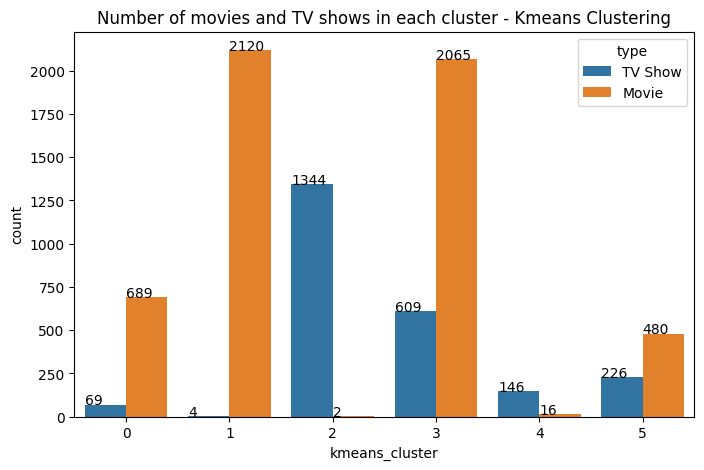

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(8,5))
graph = sns.countplot(x='kmeans_cluster',data=df, hue='type')
plt.title('Number of movies and TV shows in each cluster - Kmeans Clustering')

# adding value count on the top of bar
for p in graph.patches:
  graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

**Hence, successfully built 6 clusters.**

## **Hierarchical clustering**

Hierarchical clustering is another popular clustering algorithm used in unsupervised machine learning. Unlike K-means clustering, which requires specifying the number of clusters beforehand, hierarchical clustering creates a hierarchy of clusters in a tree-like structure, known as a dendrogram.
<br>
There are two main types of hierarchical clustering:
- Agglomerative (bottom-up): This approach starts with each data point as an individual cluster and iteratively merges the closest pairs of clusters based on a similarity or distance metric.
- Divisive (top-down): This approach begins with all data points in a single cluster and recursively splits the cluster into smaller clusters until each data point is in its own cluster or a stopping criterion is reached.

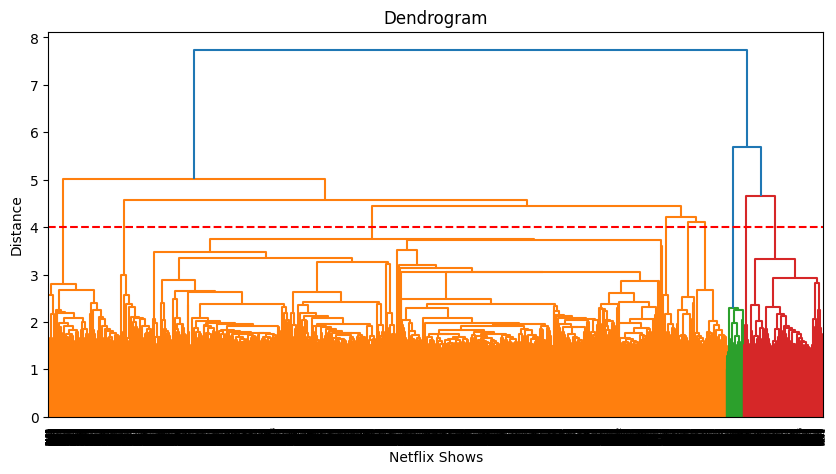

In [ ]:
# Making a dendogram to decide the number of clusters
plt.figure(figsize=(10, 5))
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 4, color='r', linestyle='--')

The dendogram shows that the 7 clusters can be formed at the distance of 4 unit. Hence, building 7 clusters using agglomerative clustering algorithm.

In [ ]:
# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(X)

array([1, 0, 2, ..., 2, 1, 2])

In [ ]:
# Adding a hierarchical cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_

In [ ]:
df.sample(5)[['type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', 'description', 'hierarchical_cluster']]

,type,title,director,cast,country,rating,listed_in,description,hierarchical_cluster
7320,Movie,Unbridled,Jota Linares,"Natalia de Molina, Daniel Grao, Natalia Mateo,...",Spain,TV-MA,"International Movies, Thrillers","Desperate to keep her husband’s secret, a devo...",2
1782,Movie,Dismissed,Benjamin Arfmann,"Kent Osborne, Dylan Sprouse, Rae Gray, Alycia ...",United States,TV-14,Thrillers,An intelligent but intense honor student traum...,2
7200,TV Show,Travelers,,"Eric McCormack, MacKenzie Porter, Nesta Cooper...","Canada, United States",TV-MA,"Crime TV Shows, International TV Shows, TV Dramas",A federal agent tracks four people who suddenl...,1
1064,TV Show,Bountiful Blessings,,"Jessica Hsuan, Tay Ping Hui, Thomas Ong, Jeffr...",Singapore,TV-14,"International TV Shows, TV Dramas, TV Sci-Fi &...",A former mortal who is now the Kitchen God coo...,1
7112,Movie,To All the Boys: P.S. I Still Love You,Michael Fimognari,"Lana Condor, Noah Centineo, Jordan Fisher, Ann...",United States,TV-14,"Comedies, Romantic Movies","Lara Jean is officially Peter’s girlfriend, so...",2


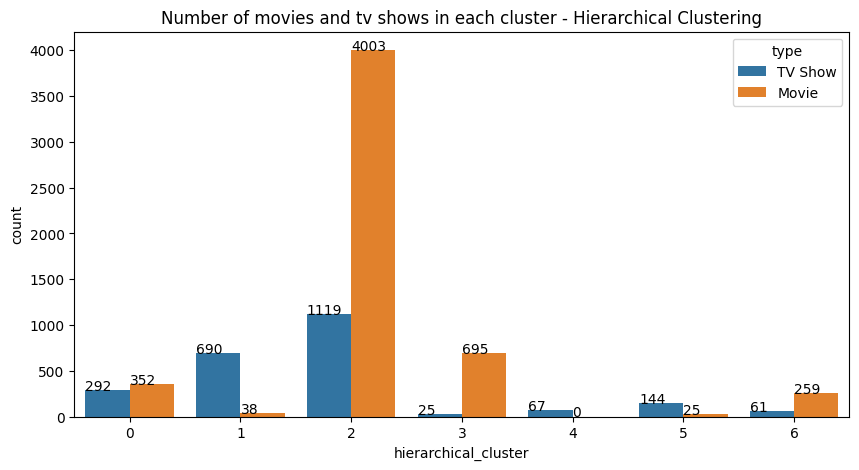

In [ ]:
# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
graph = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')


# adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()))

**Successfully built 7 clusters using hierarchial clustering**

# **Recommdendation System**

Recommendation systems are widely used in machine learning to provide personalized recommendations to users. They are employed in various domains such as e-commerce, movie streaming platforms, social media, and more. When developing a recommendation system, it is essential to consider factors such as the available data, scalability, interpretability, and user privacy.

In [ ]:
# checking index
df[['show_id', 'title', 'text_data']]

,show_id,title,text_data
0,s1,3%,joão miguel bianca comparato michel gome rodol...
1,s2,7:19,jorg michel graudemián bichir héctor bonilla o...
2,s3,23:59,gilbert chantedd chan stella chung henley hii ...
3,s4,9,shane ackerelijah wood john c reilli jennif co...
4,s5,21,robert luketicjim sturgess kevin spacey kate b...
...,...,...,...
7782,s7783,Zozo,josef faresimad creidi antoinett turk elia ger...
7783,s7784,Zubaan,mozez singhvicki kaushal sarahjan dia raaghav ...
7784,s7785,Zulu Man in Japan,nasti c tvmadocumentari intern movi music musi...
7785,s7786,Zumbo's Just Desserts,adriano zumbo rachel khooaustraliatvpgintern t...


For content-based reccomendation system, we will determine the similarity score based on specific index_id for that particular "tags" column.

In [ ]:
# defining new dataframe for building recommandation system
recommender_df = df.copy()

# reseting index
recommender_df.reset_index(inplace=True)

# checking whether or not reset index properly
recommender_df[['show_id', 'title', 'text_data']]

,show_id,title,text_data
0,s1,3%,joão miguel bianca comparato michel gome rodol...
1,s2,7:19,jorg michel graudemián bichir héctor bonilla o...
2,s3,23:59,gilbert chantedd chan stella chung henley hii ...
3,s4,9,shane ackerelijah wood john c reilli jennif co...
4,s5,21,robert luketicjim sturgess kevin spacey kate b...
...,...,...,...
7765,s7783,Zozo,josef faresimad creidi antoinett turk elia ger...
7766,s7784,Zubaan,mozez singhvicki kaushal sarahjan dia raaghav ...
7767,s7785,Zulu Man in Japan,nasti c tvmadocumentari intern movi music musi...
7768,s7786,Zumbo's Just Desserts,adriano zumbo rachel khooaustraliatvpgintern t...


In [ ]:
# dropping show-id and index column
recommender_df.drop(columns=['index', 'show_id'], inplace=True)

In [ ]:
print(f"before reset index id for movie 'Zero' : {df[df['title'] == 'Zozo'].index[0]}")
print(f"after reset index id for movie 'Zero': {recommender_df[recommender_df['title'] == 'Zozo'].index[0]}")

before reset index id for movie 'Zero' : 7782
after reset index id for movie 'Zero': 7765


In [ ]:
# calling out transformed array independent features created from text_data(cluster) column after performing PCA for dimenssionality reduction.
X

array([[ 1.59793139e-01, -8.53992628e-03, -5.55391070e-03, ...,
         1.14363002e-02, -1.22604693e-02,  5.60151186e-03],
       [-4.13081153e-02,  1.72476920e-02, -1.66261861e-02, ...,
        -1.48218811e-03,  9.16538255e-04,  1.37716848e-02],
       [-4.11128084e-02,  3.21271439e-02,  5.44475869e-02, ...,
         9.90677115e-03,  1.64987847e-02, -2.38066772e-03],
       ...,
       [-6.61635132e-02,  3.45251086e-03, -7.51697211e-02, ...,
        -1.79289909e-03, -1.49988702e-02,  1.20735636e-02],
       [ 5.44946481e-02, -3.25189084e-02, -3.18956106e-02, ...,
         8.81504519e-03, -2.08832559e-03, -2.79605020e-03],
       [-7.29301282e-02, -1.48837000e-01, -1.58585384e-01, ...,
         2.29135684e-03, -5.29703587e-03, -1.40128049e-04]])

In [ ]:
# calculate cosine similarity
similarity = cosine_similarity(X)
similarity

array([[ 1.        ,  0.08021778,  0.01977675, ..., -0.02173105,
         0.0013999 , -0.01763917],
       [ 0.08021778,  1.        , -0.00494593, ...,  0.06009322,
        -0.01008   , -0.01103258],
       [ 0.01977675, -0.00494593,  1.        , ..., -0.00527496,
        -0.00972708, -0.01690256],
       ...,
       [-0.02173105,  0.06009322, -0.00527496, ...,  1.        ,
        -0.00451774,  0.11858882],
       [ 0.0013999 , -0.01008   , -0.00972708, ..., -0.00451774,
         1.        ,  0.03724866],
       [-0.01763917, -0.01103258, -0.01690256, ...,  0.11858882,
         0.03724866,  1.        ]])

In [ ]:
def recommend(movie):
    '''
    This function list down top ten movies on the basis of similarity score for that perticular movie.
    '''
    print(f"If you liked '{movie}', you may also enjoy: \n")

    # find out index position
    index = recommender_df[recommender_df['title'] == movie].index[0]

    # sorting on the basis of simliarity score, In order to find out distaces from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # listing top ten recommenaded movie
    for i in distances[1:11]:
        print(df.iloc[i[0]].title)

In [ ]:
recommend('Breaking Bad')

If you liked 'Breaking Bad', you may also enjoy: 

Better Call Saul
Hormones
Servant of the People
My Life My Story
MINDHUNTER
Killer Inside: The Mind of Aaron Hernandez
W/ Bob & David
Time Share
The School Nurse Files
The Underclass


In [ ]:
recommend('Ishqiya')

If you liked 'Ishqiya', you may also enjoy: 

Dedh Ishqiya
Golmaal: Fun Unlimited
TE3N
Küçük Esnaf
Dhamaal
Barah Aana
Ghanchakkar
Kismat Konnection
Golmaal Returns
Happy Old Year


# **Conclusion**

In this project, we have done clustering of Netflix shows and movies in such a way that shows with similar specification are grouped into same cluster.

- There are 7787 records and 11 columns in the dataset.
- Initially, we have done data cleaning and EDA of the dataset.
- It was found that Netflix produces more movies than TV shows and the total number of shows is increasing rapidly.
- The highest number of shows are found in the United States.
- From 2015, TV shows are also taking prominent place in the Netflix.
- The attributes are chosen for clustering the data: cast, country, genre, director, rating, and description.
- The issue of dimensionality reduction is solved through the use of principal component analysis.
- In K-means clustering, the optimal number of clusters that are formed is 6.
The elbow and silhouette method is used to find the perfect number of clusters.
- In agglomerative clustering algorithm, the optimal value of cluster is found to be 7.
- The cosine similarity is used to create a content-based recommender system.

## **Hurrah! We have successfully completed Machine Learning Capstone Project !!!**